SGDClassifier
  - 확률적 경사하강법이 적용된 모델

확률적 경사하강법
  - 신경망과 복잡한 모델에서 사용, 테이터셋이 크고 복잡할때 유용
  - 손실값이 최저가 되는 방향으로 파라메터(가중치)를 조정
  - z = ax + bx2 + cx3 + d

In [3]:
import pandas as pd

In [7]:
url = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/10%EC%A3%BC%EC%B0%A8/data.csv'
data = pd.read_csv(url).to_numpy()
X = data[:,1:]
y = data[:,0]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,y,random_state=42,stratify=y)

In [10]:
# 표준화 StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled =  ss.transform(x_train)
x_test_scaled =  ss.transform(x_test)

In [11]:
# 모델
from sklearn.linear_model import SGDClassifier

In [12]:
# L2 : Ridge 가중치의 제곱합값의 합을 추가
# L1 : Lasso 가중치의 절대값의 합을 추가
sgdc =   SGDClassifier()
sgdc.fit(x_train_scaled,y_train)
# 평가  학습데이터와,테스트데이터 --> 과적합유무를 판단
sgdc.score(x_train_scaled,y_train), sgdc.score(x_test_scaled,y_test)


(0.907563025210084, 0.85)

In [13]:
# 과적합
# 테스트성능이 더 좋음
# 둘다 나쁨
# 학습과 테스트 차이가 큼
sgdc.partial_fit(x_train_scaled,y_train)
sgdc.score(x_train_scaled,y_train), sgdc.score(x_test_scaled,y_test)

(0.8739495798319328, 0.875)

In [14]:
# partial_fit 은 1 epoch를 수행한 것임  max_iter와 같은 개념이 epoch

In [71]:
import numpy as np
x_train,x_test,y_train,y_test =  train_test_split(X,y,random_state=42)
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled =  ss.transform(x_train)
x_test_scaled =  ss.transform(x_test)
# tol 허용오차 : 이전학습과 현재학습의 차이가 tol 값 을 넘어가지 않으면 학습을 종료 - 조기종료(early stopping)
sgdc = SGDClassifier(loss='log_loss', random_state=42,penalty='l1', tol=0.1)
train_score = []
test_score = []
classes = np.unique(y)

In [72]:
for _ in range(0,1000):
  sgdc.partial_fit(x_train_scaled, y_train, classes=classes)
  train_score.append(sgdc.score(x_train_scaled, y_train))
  test_score.append(sgdc.score(x_test_scaled, y_test))

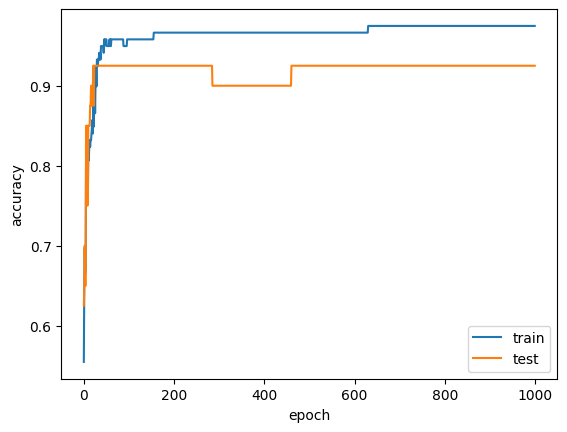

In [73]:
import matplotlib.pyplot as plt
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [70]:
sgdc = SGDClassifier(loss='log_loss', random_state=42, max_iter=200,tol=None)
sgdc.fit(x_train_scaled,y_train)
sgdc.score(x_train_scaled,y_train),  sgdc.score(x_test_scaled,y_test)

(0.9495798319327731, 0.925)